In [13]:
import gensim
import re
import pandas as pd
import matplotlib.pyplot as plt
from gensim import corpora
from tqdm import tqdm
from gensim.models import CoherenceModel
from nltk.tokenize import word_tokenize

In [2]:
data = pd.read_pickle("data_pre.pkl")
data

,rating,productID,reviewText,summary,style,reviewTotal,reviewWord
0,2,7106116521,"I agree with the other review, the opening is ...","I agree with the other review, the opening is ...",NaN,"I agree with the other review, the opening is ...","[review, opening, small, hook, expensive, earr..."
1,1,B00008JOQI,"We tried these shirts in the pinpoint fabric, ...",Paul Fredrick dress shirt VERY hard to iron,NaN,"We tried these shirts in the pinpoint fabric, ...","[shirt, pinpoint, fabric, bad, wrinkled, shirt..."
2,2,B00008JOQI,"As other reviewers have said, this shirt fit f...","Shrinks excessively when washed, unacceptable ...","{'Size:': ' 17 - 35', 'Color:': ' White'}","As other reviewers have said, this shirt fit f...","[reviewer, shirt, fine, package, label, shirt,..."
3,1,B00008JOQI,This shirt was the right size when it arrived....,Shrinks too much,"{'Size:': ' 17 - 34', 'Color:': ' White'}",This shirt was the right size when it arrived....,"[shirt, right, size, cold, water, sleeve, half..."
4,1,B00008JOQI,Shirt fit fine out of packaging. Washed accord...,One Star,"{'Size:': ' 19 - 37', 'Color:': ' French Blue'}",Shirt fit fine out of packaging. Washed accord...,"[shirt, fine, packaging, instruction, shrunk, ..."
...,...,...,...,...,...,...,...
19431,1,B01HJ5WLQE,"Size of shirt is way off, maybe 4 sizes too sm...","***Too small,**** cheap thin material, & shirt...",NaN,"Size of shirt is way off, maybe 4 sizes too sm...","[size, shirt, way, small, fabric, smell, stron..."
19432,1,B01HJ5WMAO,I ordered the 5X and it's really the size of a...,Don't waste your money.,NaN,I ordered the 5X and it's really the size of a...,"[x, size, medium, thin, fabric, waste, money]"
19433,2,B01HJ5WL82,Way too small ....,Two Stars,NaN,Way too small .... Two Stars,"[way, small, star]"
19434,1,B01HJEOBUO,"Cute print, material as expected, seams ok, bu...",Dont bother,NaN,"Cute print, material as expected, seams ok, bu...","[cute, print, material, seam, small, size, bre..."


In [3]:
data['reviewWord'][0][1] #단어가 똑바로 출력되는지 확인

'opening'

In [4]:
dictionary = corpora.Dictionary(data['reviewWord']) #단어를 숫자로
corpus = [dictionary.doc2bow(text) for text in data['reviewWord']] #문서를 숫자로 bow = bagofwords

In [5]:
print(dictionary[66])

lot


In [6]:
len(dictionary)

12027

In [7]:
#토픽 별로 어떤 단어가 출력되는지 확인
NUM_TOPICS = 20
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
topics = ldamodel.print_topics(num_words=10)
for topic in topics:
    print(topic)

(0, '0.194*"size" + 0.060*"small" + 0.035*"old" + 0.027*"year" + 0.025*"chart" + 0.024*"big" + 0.021*"child" + 0.021*"x" + 0.020*"large" + 0.019*"true"')
(1, '0.076*"terrible" + 0.046*"real" + 0.040*"box" + 0.016*"return" + 0.015*"label" + 0.015*"good" + 0.014*"something" + 0.014*"amazon" + 0.013*"easy" + 0.013*"thing"')
(2, '0.128*"dress" + 0.108*"picture" + 0.069*"material" + 0.057*"cheap" + 0.037*"nothing" + 0.030*"fabric" + 0.028*"thin" + 0.023*"look" + 0.019*"skirt" + 0.018*"disappointed"')
(3, '0.101*"short" + 0.030*"glass" + 0.027*"good" + 0.023*"inch" + 0.022*"butt" + 0.022*"length" + 0.021*"suit" + 0.019*"boob" + 0.015*"crotch" + 0.015*"torso"')
(4, '0.075*"ring" + 0.066*"happy" + 0.033*"image" + 0.029*"stone" + 0.022*"finger" + 0.018*"name" + 0.017*"wedding" + 0.016*"day" + 0.015*"crap" + 0.014*"month"')
(5, '0.074*"coat" + 0.070*"hat" + 0.059*"xxl" + 0.055*"head" + 0.040*"baby" + 0.023*"rip" + 0.020*"husband" + 0.019*"man" + 0.018*"snap" + 0.017*"warm"')
(6, '0.037*"piece" +

In [8]:
RANDOM_STATE = 42

In [9]:
#topic 수를 정하기 위해 coherence와 perplexity 측정
#coherence(응집도)는 높을수록, perplexity(혼잡도)는 낮을수록 좋음
coherence_values = []
perplexity_values = []

for i in tqdm(range(2, 31)):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, random_state = RANDOM_STATE, num_topics=i, id2word = dictionary, passes = 30)
    coherence_model = CoherenceModel(model=ldamodel, texts=data['reviewWord'], dictionary=dictionary)
    coherence = coherence_model.get_coherence()
    coherence_values.append(coherence)
    perplexity_values.append(ldamodel.log_perplexity(corpus))

100%|█████████████████████████████████████████████████████████████████████████████████| 29/29 [54:09<00:00, 112.06s/it]


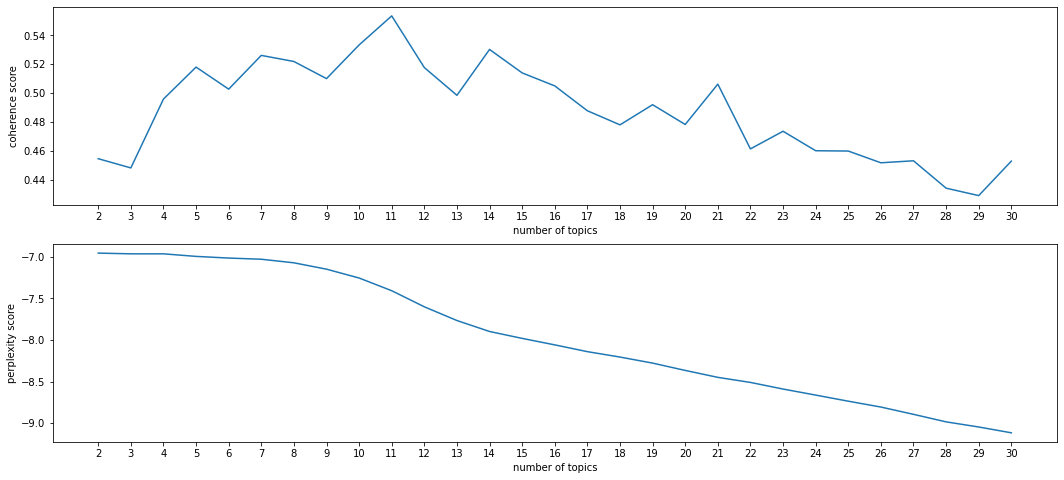

In [10]:
f, ax = plt.subplots(2,1, figsize = (18,8))
x = range(2, 31)
xticks = range(2, 31)

ax[0].plot(x, coherence_values)
ax[0].set_xlabel("number of topics")
ax[0].set_ylabel("coherence score")
ax[0].set_xticks(xticks)

ax[1].plot(x, perplexity_values)
ax[1].set_xlabel("number of topics")
ax[1].set_ylabel("perplexity score")
ax[1].set_xticks(xticks)

plt.show()

In [19]:
NUM_TOPICS = 14
ldamodel = gensim.models.ldamodel.LdaModel(corpus, random_state = RANDOM_STATE, num_topics = NUM_TOPICS, id2word=dictionary, passes=30)
topics = ldamodel.print_topics(num_words=20)
for topic in topics:
    print(topic)                                                                                                                                                                                                                                                 

(0, '0.081*"belt" + 0.049*"xxl" + 0.039*"leather" + 0.031*"false" + 0.028*"description" + 0.024*"buckle" + 0.021*"advertising" + 0.015*"inch" + 0.013*"advertisement" + 0.013*"narrow" + 0.013*"funny" + 0.012*"pouch" + 0.011*"tear" + 0.011*"waistband" + 0.010*"brief" + 0.010*"wide" + 0.010*"backpack" + 0.010*"cloth" + 0.009*"tail" + 0.009*"stripe"')
(1, '0.028*"ring" + 0.021*"day" + 0.016*"bracelet" + 0.015*"necklace" + 0.015*"disappointed" + 0.015*"time" + 0.014*"chain" + 0.014*"gift" + 0.013*"stone" + 0.013*"piece" + 0.012*"buyer" + 0.012*"beware" + 0.012*"box" + 0.012*"beautiful" + 0.011*"item" + 0.011*"earring" + 0.011*"metal" + 0.010*"image" + 0.010*"refund" + 0.009*"silver"')
(2, '0.198*"dress" + 0.078*"short" + 0.030*"picture" + 0.028*"length" + 0.025*"waist" + 0.020*"coat" + 0.017*"material" + 0.016*"fabric" + 0.016*"fit" + 0.015*"way" + 0.015*"inch" + 0.013*"long" + 0.011*"butt" + 0.011*"hip" + 0.011*"disappointed" + 0.010*"tall" + 0.009*"area" + 0.009*"look" + 0.009*"torso" + 0

In [24]:
list_topics_words = []

for topic in topics:
    list_topics_words.append(word_tokenize(re.sub('[^a-zA-Z]', ' ',topic[1])))

In [25]:
topics_by_words = pd.DataFrame(list_topics_words)
topics_by_words.to_csv("topics_by_words.csv")
topics_by_words.to_excel("topics_by_words.xlsx")
topics_by_words

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,belt,xxl,leather,false,description,buckle,advertising,inch,advertisement,narrow,funny,pouch,tear,waistband,brief,wide,backpack,cloth,tail,stripe
1,ring,day,bracelet,necklace,disappointed,time,chain,gift,stone,piece,buyer,beware,box,beautiful,item,earring,metal,image,refund,silver
2,dress,short,picture,length,waist,coat,material,fabric,fit,way,inch,long,butt,hip,disappointed,tall,area,look,torso,chest
3,cheap,money,material,waste,horrible,picture,terrible,nothing,bad,smell,awful,time,look,fabric,china,thin,piece,worth,plastic,junk
4,quality,product,poor,good,item,bad,return,seller,amazon,review,price,company,disappointed,cost,shipping,low,purchase,great,order,customer
5,small,size,large,way,big,medium,xl,fit,order,x,woman,sizing,chart,disappointed,extra,review,true,tight,child,cute
6,time,first,pair,pant,second,glass,great,day,good,thing,ear,water,hole,hour,one,new,brand,leg,wear,something
7,top,bottom,fit,arm,back,sleeve,side,costume,jacket,front,tight,big,part,way,cute,hole,loose,lace,button,weird
8,star,shoe,foot,sock,boot,toe,bead,rating,big,heel,useless,pearl,pair,calf,ankle,time,sole,wire,reference,work
9,year,old,suit,cute,month,design,daughter,son,great,good,day,baby,last,crap,bathing,week,trip,girl,odor,super
